In [1]:
import numpy as np

In [2]:
%mkdir dataset
!cp '/content/drive/MyDrive/mix.zip' dataset/
%cd dataset

/content/dataset


In [3]:
!unzip -q mix.zip 
%cd mix

/content/dataset/mix


In [4]:
!cp /content/drive/MyDrive/AtmosphericDustResNet50FineTune.h5 /content/dataset

In [5]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input 

In [6]:
loaded_model = tf.keras.models.load_model('../AtmosphericDustResNet50FineTune.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                64064     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25,700,906
Trainable params: 64,194
Non-

In [8]:
!pwd

/content/dataset/mix


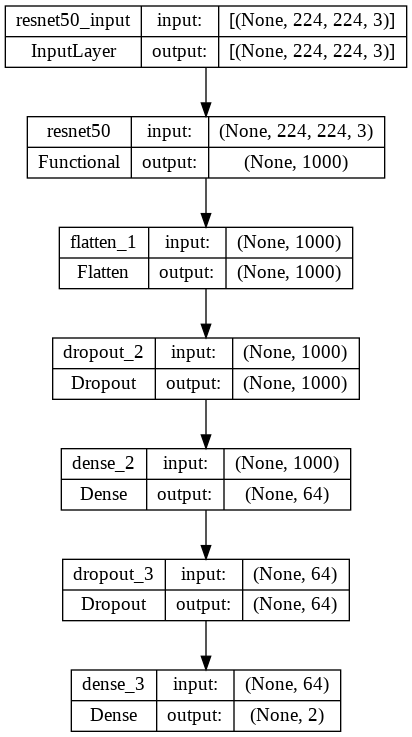

In [7]:
tf.keras.utils.plot_model(
    loaded_model,
    to_file='res.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [9]:
from PIL import Image
import glob
import os

p = '/content/dataset/mix/'
curr_dir = os.getcwd()
pred_list = []
for x in glob.glob(p+'*.png'):
  img=Image.open(x)
  pred_list.append(img)

In [10]:
pilImg_list = []
for i in range(len(pred_list)):
  pilImg_list.append(np.asarray(pred_list[i]))

In [11]:
img_arr = np.array(pilImg_list)

In [12]:
import cv2

img_arr_rn = []
for i in range(len(img_arr)):
  res = cv2.resize(img_arr[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
  img_arr_rn.append(res)

In [13]:
pred_arr = np.array(img_arr_rn)

In [14]:
pred_arr = np.repeat(pred_arr[:, :, :, np.newaxis], 3, axis=3)

In [15]:
from skimage import io
from matplotlib import cm

1/1 [==============================] - 3s 3s/step
Class is: 0


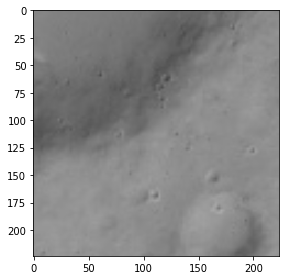

In [16]:
predictions = loaded_model.predict(pred_arr[0:10])
io.imshow(pred_arr[0],cmap='gray')
preds = tf.argmax(predictions[0])
tf.print(f'Class is: {preds}')

Class is: 1


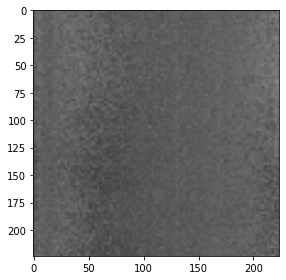

In [17]:
io.imshow(pred_arr[1],cmap='gray')
preds = tf.argmax(predictions[1])
tf.print(f'Class is: {preds}')

1/1 [==============================] - 3s 3s/step
Class is: 1


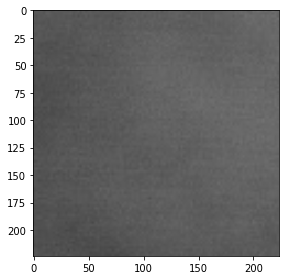

In [18]:
predictions = loaded_model.predict(pred_arr[0:len(pred_arr)])
io.imshow(pred_arr[7],cmap='gray')
preds = tf.argmax(predictions[7])
tf.print(f'Class is: {preds}')

In [19]:
len(pred_arr)

14

In [20]:
pred_arr.shape

(14, 224, 224, 3)

In [21]:
pil_arr = []
for x in pred_arr:
   pil_arr.append(Image.fromarray(x.astype('uint8')))

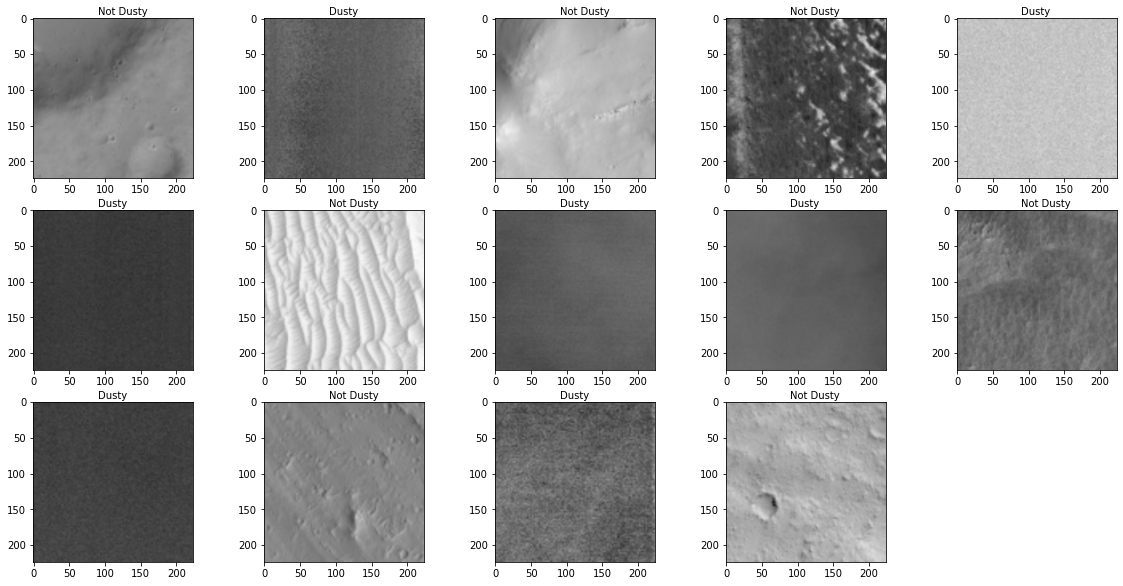

In [22]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(pil_arr):
  plt.subplot(len(pil_arr) / columns + 1, columns, i + 1)
  preds = tf.argmax(predictions[i])
  preds = preds.numpy()
  if preds == 0:
    res = "Not Dusty"
  else:
    res = "Dusty"

  text = f"{res}"
  plt.text(90,-5,text)
  plt.imshow(image, cmap='gray')

In [23]:
dusty_save = []
non_dusty_save = []

for i, image in enumerate(pil_arr):
  preds = tf.argmax(predictions[i])
  preds = preds.numpy()
  if preds == 0:
    non_dusty_save.append(image)
  else:
    dusty_save.append(image)

In [24]:
dusty_save = np.array(dusty_save)
non_dusty_save = np.array(non_dusty_save)
np.savez('save.npz', name1=dusty_save, name2=non_dusty_save)

<ipython-input-24-efaa81f3ee55>:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  dusty_save = np.array(dusty_save)
<ipython-input-24-efaa81f3ee55>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dusty_save = np.array(dusty_save)
<ipython-input-24-efaa81f3ee55>:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding pr